In [11]:
import numpy as np
import copy
import matplotlib.pyplot as plt

# Part 1
### Q in 5 state
Solve using tabular Q-learning and ε-greedy. 

Provide the optimal Q-values, discuss the learning rate α and ε (4 points)

In [2]:
# define the transition action
# γmaxa′ Q(x′, a′) 
def transition(Q = np.zeros((5,2)),states=5,discount = 0.9):
    new_Q = copy.deepcopy(Q)
    for i in range(states-1):
        # Action a: Q(x,a) = Q(x,a)+ discount * maxQ(x+1,a')
        new_Q[i,0] = discount*max(Q[i+1,0],Q[i+1,1]) 
        # Action b:
        new_Q[i+1,1] = discount*max(Q[0,0],Q[0,1])

    new_Q[states-1,0] = discount*max(Q[states-1,0],Q[states-1,1])
    new_Q[0,1] = discount*max(Q[0,0],Q[0,1])
    return new_Q

In [3]:
# define the random transition action
# γmaxa′ Q(x′, a′) 
def transition_random(Q = np.zeros((5,2)),states=5,discount = 0.9):
    new_Q = copy.deepcopy(Q)
    for i in range(states-1):
        # Action a: Q(x,a) = Q(x,a)+ discount * maxQ(x+1,a')
        new_Q[i,0] = discount*[Q[i+1,0],Q[i+1,1]][np.random.randint(0,2)]
        # Action b:
        new_Q[i+1,1] = discount*[Q[0,0],Q[0,1]][np.random.randint(0,2)]
    new_Q[states-1,0] = discount*[Q[states-1,0],Q[states-1,1]][np.random.randint(0,2)]
    new_Q[0,1] = discount*[Q[0,0],Q[0,1]][np.random.randint(0,2)]
    return new_Q

In [4]:
# This is the test part
# initializa the Q values arbitrarily
Q = np.zeros((5,2))
Q[0,1] = 0.2
Q[4,0] = 1
reward = np.zeros((5,2))
reward[0,1] = 0.2
reward[4,0] = 1

# Q = np.array(([0,0.2],[0,0],[0,0],[0,0],[1,0]))
print(Q)


for i in range(5):
    print(i)
    print(reward + transition(Q,5,0.9))
    Q = reward + transition(Q,5,0.9)

[[0.  0.2]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [1.  0. ]]
0
[[0.   0.38]
 [0.   0.18]
 [0.   0.18]
 [0.9  0.18]
 [1.9  0.18]]
1
[[0.162 0.542]
 [0.162 0.342]
 [0.81  0.342]
 [1.71  0.342]
 [2.71  0.342]]
2
[[0.3078 0.6878]
 [0.729  0.4878]
 [1.539  0.4878]
 [2.439  0.4878]
 [3.439  0.4878]]
3
[[0.6561  0.81902]
 [1.3851  0.61902]
 [2.1951  0.61902]
 [3.0951  0.61902]
 [4.0951  0.61902]]
4
[[1.24659  0.937118]
 [1.97559  0.737118]
 [2.78559  0.737118]
 [3.68559  0.737118]
 [4.68559  0.737118]]


In [27]:
# define a function called greedy in 5 states
# Q(x, a) ← Q(x, a) + α[r + γmaxa′ Q(x′, a′) − Q(x, a)]

def Greedy_5(greedy=1,alpha=0.5,discount=0.9,times=10000):   
    reward = np.zeros((5,2))
    reward[0,1] = 0.2
    reward[4,0] = 1
#     print(reward)

    # initializa the Q values arbitrarily
    Q = np.zeros((5,2))
    diff = 100
    for i in range(times):
        prob = np.random.random()
        if(greedy<prob):
            new_Q = Q + alpha*(reward + transition(Q,5,discount) - Q)
        else:
            new_Q = Q + alpha*(reward + transition_random(Q,5,discount) - Q)
        Q_diff = abs((new_Q-Q).reshape(10,1))
#         diff = max(Q_diff)-min(Q_diff)
        diff = (Q_diff**2).sum(axis=(0,1))
        if(diff > 0.00000001):
            Q = copy.deepcopy(new_Q)
        else:  # if(diff < 0.00001):
#             print("\n",i,":\nnew Q:\n",new_Q,diff,"\nQ:\n",Q,"\nQ diff:\n",Q_diff)
            return(i,new_Q)


### the optimal Q value while greedy=1 and learning rate = 1

In [6]:
# test
greedy = 0.9
alpha = 0.8 #learning rate
discount = 0.9
times = 100000

Greedy_5(greedy,alpha,discount,times)[0]

2159

In [30]:
# discuss about the e-greedy and learning rate
greedy_list = np.arange(1,0,-0.1)
learning_rate_list = np.arange(1,0,-0.1)

# while greedy is less than 0.8, Q will not converge in 100,000 times

print(greedy_list)
print(learning_rate_list)

[1.  0.9 0.8 0.7 0.6 0.5 0.4 0.3 0.2 0.1]
[1.  0.9 0.8 0.7 0.6 0.5 0.4 0.3 0.2 0.1]


In [160]:
def simulation_5(greedy_list=np.arange(1,0,-0.1),learning_rate_list = np.arange(1,0,-0.1),discount=0.9,times = 100000):
    Qs = []
    greedys_list = []
    alphas_list = []
    convergetimes_list = []
    simulation = []

    for i in range(len(learning_rate_list)):
        greedys = []
        alphas = []
        alphas.append(learning_rate_list[i])
        convergetimes = []
        for j in range(len(greedy_list)):
            greedy = greedy_list[j]
            greedys.append(greedy_list[j])
            alpha = learning_rate_list[i]
            
#             discount = 0.9
#             times = 100000
            result_Q = Greedy_5(greedy,alpha,discount,times)

            if(result_Q!=None):
                Qs.append([result_Q[0],result_Q[1]])
                convergetimes.append(result_Q[0])
                print("greedy:",greedy,"alpha:",alpha,result_Q[0])
            else:
                Qs.append([None,None])
                convergetimes.append(0)
                print("greedy:",greedy,"alpha:",alpha,None)
        greedys_list.append(greedys)
        alphas_list.append(alphas)
        convergetimes_list.append(convergetimes)
        simulation.append(["greedys_list:",greedys_list])
        simulation.append(["alphas_list:",alphas_list])
        simulation.append(["convergetimes_list",convergetimes_list])
        simulation.append(["Qs:",Qs])
    return simulation

In [47]:
# simulation_5()

In [158]:
# discuss about the e-greedy and learning rate
greedy_list = np.arange(0,0.21,0.01)
learning_rate_list = np.arange(1,0.75,-0.05)

# while greedy is less than 0.8, Q will not converge in 100,000 times

print(greedy_list)
print(learning_rate_list)


[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2 ]
[1.   0.95 0.9  0.85 0.8 ]


In [161]:
simulation =simulation_5(greedy_list,learning_rate_list)

greedy: 0.0 alpha: 1.0 99
greedy: 0.01 alpha: 1.0 99
greedy: 0.02 alpha: 1.0 248
greedy: 0.03 alpha: 1.0 282
greedy: 0.04 alpha: 1.0 177
greedy: 0.05 alpha: 1.0 124
greedy: 0.06 alpha: 1.0 1097
greedy: 0.07 alpha: 1.0 1322
greedy: 0.08 alpha: 1.0 1976
greedy: 0.09 alpha: 1.0 3133
greedy: 0.1 alpha: 1.0 726
greedy: 0.11 alpha: 1.0 5400
greedy: 0.12 alpha: 1.0 9491
greedy: 0.13 alpha: 1.0 620
greedy: 0.14 alpha: 1.0 1404
greedy: 0.15 alpha: 1.0 1244
greedy: 0.16 alpha: 1.0 20526
greedy: 0.17 alpha: 1.0 8753
greedy: 0.18 alpha: 1.0 None
greedy: 0.19 alpha: 1.0 None
greedy: 0.2 alpha: 1.0 None
greedy: 0.0 alpha: 0.95 104
greedy: 0.01 alpha: 0.95 116
greedy: 0.02 alpha: 0.95 139
greedy: 0.03 alpha: 0.95 250
greedy: 0.04 alpha: 0.95 176
greedy: 0.05 alpha: 0.95 282
greedy: 0.06 alpha: 0.95 904
greedy: 0.07 alpha: 0.95 1993
greedy: 0.08 alpha: 0.95 122
greedy: 0.09 alpha: 0.95 3601
greedy: 0.1 alpha: 0.95 6443
greedy: 0.11 alpha: 0.95 1403
greedy: 0.12 alpha: 0.95 3647
greedy: 0.13 alpha: 0.9

In [162]:
print(simulation)

[['greedys_list:', [[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2], [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2], [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2], [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2], [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2]]], ['alphas_list:', [[1.0], [0.95], [0.8999999999999999], [0.8499999999999999], [0.7999999999999998]]], ['convergetimes_list', [[99, 99, 248, 282, 177, 124, 1097, 1322, 1976, 3133, 726, 5400, 9491, 620, 1404, 1244, 20526, 8753, 0, 0, 0], [104, 116, 139, 250, 176, 282, 904, 1993, 122, 3601, 6443, 1403, 3647, 8103, 32581, 29049, 0, 8810, 63088, 0, 0], [109

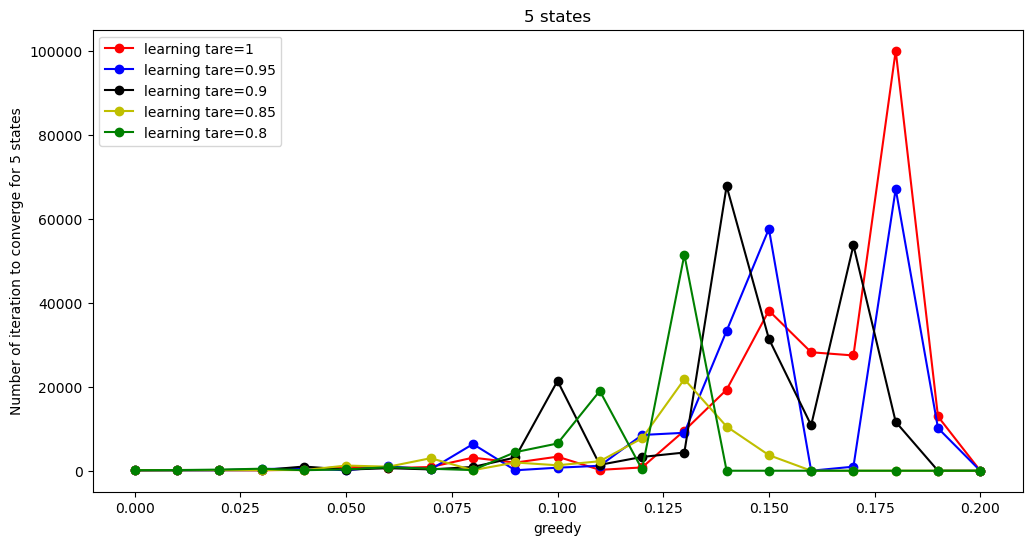

In [149]:
greedys_list = simulation[0][1]
alphas_list = simulation[1][1]
convergetimes_list = simulation[2][1]

print(greedys_list)
print(alphas_list)
print(convergetimes_list)
plt.figure(1,figsize=(12,6))

plt.plot(greedys_list[0], convergetimes_list[0], marker='o', color='r', label='learning tare=1')
plt.plot(greedys_list[1], convergetimes_list[1], marker='o', color='b', label='learning tare=0.95')
plt.plot(greedys_list[2], convergetimes_list[2], marker='o', color='black', label='learning tare=0.9')
plt.plot(greedys_list[3], convergetimes_list[3], marker='o', color='y', label='learning tare=0.85')
plt.plot(greedys_list[4], convergetimes_list[4], marker='o', color='g', label='learning tare=0.8')
plt.legend()
plt.xlabel('greedy')
plt.ylabel('Number of iteration to converge for 5 states')

plt.title('5 states')
plt.show()

## 10 states

In [28]:
# define a function called greedy in 5 states
# Q(x, a) ← Q(x, a) + α[r + γmaxa′ Q(x′, a′) − Q(x, a)]

def Greedy_10(greedy=1,alpha=0.5,discount=0.9,times=10000):   
    reward = np.zeros((10,2))
    reward[0,1] = 0.2
    reward[9,0] = 1
#     print(reward)

    # initializa the Q values arbitrarily
    Q = np.zeros((10,2))
    diff = 100
    for i in range(times):
        prob = np.random.random()
        if(greedy<prob):
            new_Q = Q + alpha*(reward + transition(Q,5,discount) - Q)
        else:
            new_Q = Q + alpha*(reward + transition_random(Q,10,discount) - Q)
        Q_diff = abs((new_Q-Q).reshape(20,1))
#         diff = max(Q_diff)-min(Q_diff)
        diff = (Q_diff**2).sum(axis=(0,1))
        if(diff > 0.00000001):
            Q = copy.deepcopy(new_Q)
        else:  # if(diff < 0.00001):
#             print("\n",i,":\nnew Q:\n",new_Q,diff,"\nQ:\n",Q,"\nQ diff:\n",Q_diff)
            return(i,new_Q)




In [397]:
# test
greedy = 0.9
alpha = 0.8 #learning rate
discount = 0.9
times = 100000

Greedy_10(greedy,alpha,discount,times)

[[0.  0.2]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [1.  0. ]]


In [163]:
def simulation_10(greedy_list=np.arange(1,0,-0.1),learning_rate_list = np.arange(1,0,-0.1),discount=0.9,times = 1000000):
    Qs = []
    greedys_list = []
    alphas_list = []
    convergetimes_list = []
    simulation = []

    for i in range(len(learning_rate_list)):
        greedys = []
        alphas = []
        alphas.append(learning_rate_list[i])
        convergetimes = []
        for j in range(len(greedy_list)):
            greedy = greedy_list[j]
            greedys.append(greedy_list[j])
            alpha = learning_rate_list[i]
            
#             discount = 0.9
#             times = 100000
            result_Q = Greedy_10(greedy,alpha,discount,times)

            if(result_Q!=None):
                Qs.append([result_Q[0],result_Q[1]])
                convergetimes.append(result_Q[0])
                print("greedy:",greedy,"alpha:",alpha,result_Q[0])
            else:
                Qs.append([None,None])
                convergetimes.append(0)
                print("greedy:",greedy,"alpha:",alpha,None)
        greedys_list.append(greedys)
        alphas_list.append(alphas)
        convergetimes_list.append(convergetimes)
        simulation.append(["greedys_list:",greedys_list])
        simulation.append(["alphas_list:",alphas_list])
        simulation.append(["convergetimes_list",convergetimes_list])
        simulation.append(["Qs:",Qs])
    return simulation

In [164]:
# discuss about the e-greedy and learning rate
greedy_list = np.arange(0,0.25,0.05)
learning_rate_list = np.arange(0,1,0.1)

# while greedy is less than 0.8, Q will not converge in 100,000 times

print(greedy_list)
print(learning_rate_list)

[0.   0.05 0.1  0.15 0.2 ]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]


In [165]:
simulation = simulation_10(greedy_list,learning_rate_list)

greedy: 0.0 alpha: 0.0 0
greedy: 0.05 alpha: 0.0 0
greedy: 0.1 alpha: 0.0 0
greedy: 0.15000000000000002 alpha: 0.0 0
greedy: 0.2 alpha: 0.0 0
greedy: 0.0 alpha: 0.1 None
greedy: 0.05 alpha: 0.1 None
greedy: 0.1 alpha: 0.1 None
greedy: 0.15000000000000002 alpha: 0.1 None
greedy: 0.2 alpha: 0.1 None
greedy: 0.0 alpha: 0.2 None
greedy: 0.05 alpha: 0.2 None
greedy: 0.1 alpha: 0.2 None
greedy: 0.15000000000000002 alpha: 0.2 None
greedy: 0.2 alpha: 0.2 None
greedy: 0.0 alpha: 0.30000000000000004 None
greedy: 0.05 alpha: 0.30000000000000004 None
greedy: 0.1 alpha: 0.30000000000000004 None
greedy: 0.15000000000000002 alpha: 0.30000000000000004 None
greedy: 0.2 alpha: 0.30000000000000004 None
greedy: 0.0 alpha: 0.4 None
greedy: 0.05 alpha: 0.4 None
greedy: 0.1 alpha: 0.4 None
greedy: 0.15000000000000002 alpha: 0.4 None
greedy: 0.2 alpha: 0.4 None
greedy: 0.0 alpha: 0.5 None
greedy: 0.05 alpha: 0.5 None
greedy: 0.1 alpha: 0.5 None
greedy: 0.15000000000000002 alpha: 0.5 None
greedy: 0.2 alpha: 0.

KeyboardInterrupt: 

[[0.0, 0.05, 0.1, 0.15000000000000002, 0.2], [0.0, 0.05, 0.1, 0.15000000000000002, 0.2], [0.0, 0.05, 0.1, 0.15000000000000002, 0.2], [0.0, 0.05, 0.1, 0.15000000000000002, 0.2], [0.0, 0.05, 0.1, 0.15000000000000002, 0.2], [0.0, 0.05, 0.1, 0.15000000000000002, 0.2], [0.0, 0.05, 0.1, 0.15000000000000002, 0.2], [0.0, 0.05, 0.1, 0.15000000000000002, 0.2], [0.0, 0.05, 0.1, 0.15000000000000002, 0.2], [0.0, 0.05, 0.1, 0.15000000000000002, 0.2]]
[[0.0], [0.1], [0.2], [0.30000000000000004], [0.4], [0.5], [0.6000000000000001], [0.7000000000000001], [0.8], [0.9]]
[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]


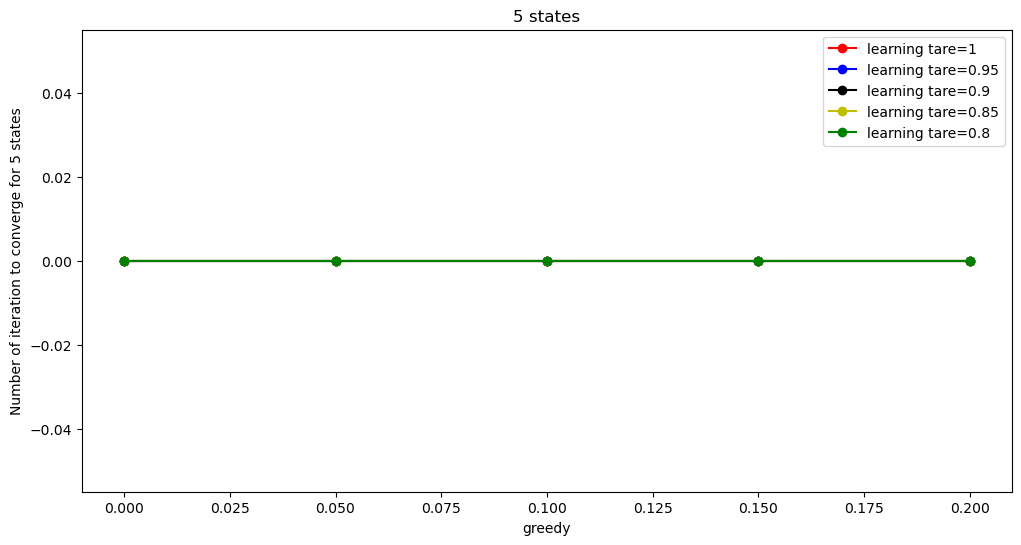

In [156]:
greedys_list = simulation[0][1]
alphas_list = simulation[1][1]
convergetimes_list = simulation[2][1]

print(greedys_list)
print(alphas_list)
print(convergetimes_list)
plt.figure(1,figsize=(12,6))

plt.plot(greedys_list[0], convergetimes_list[0], marker='o', color='r', label='learning tare=1')
plt.plot(greedys_list[1], convergetimes_list[1], marker='o', color='b', label='learning tare=0.95')
plt.plot(greedys_list[2], convergetimes_list[2], marker='o', color='black', label='learning tare=0.9')
plt.plot(greedys_list[3], convergetimes_list[3], marker='o', color='y', label='learning tare=0.85')
plt.plot(greedys_list[4], convergetimes_list[4], marker='o', color='g', label='learning tare=0.8')
plt.legend()
plt.xlabel('greedy')
plt.ylabel('Number of iteration to converge for 5 states')

plt.title('5 states')
plt.show()